In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.dates as mdates
%matplotlib inline

In [8]:
# url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
covid = pd.read_csv('owid-covid-data.csv')
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


<b>Calculating the correlation between gdp per capita and hospital beds x1000 for all countries<b>

In [9]:
gdp_beds = covid[['location','gdp_per_capita','hospital_beds_per_thousand','life_expectancy']]
gdp_beds.set_index('location', inplace=True)

gdp_beds = gdp_beds[~gdp_beds.index.duplicated(keep='first')]
gdp_beds.dropna(how='any', inplace=True)
gdp_beds.head()

,gdp_per_capita,hospital_beds_per_thousand,life_expectancy
location,,,
Afghanistan,1803.987,0.50,64.83
Albania,11803.431,2.89,78.57
Algeria,13913.839,1.90,76.88
Antigua and Barbuda,21490.943,3.80,77.02
Argentina,18933.907,5.00,76.67


In [10]:
gdp_beds.sort_values('hospital_beds_per_thousand', ascending=False).head(10)

,gdp_per_capita,hospital_beds_per_thousand,life_expectancy
location,,,
Japan,39002.223,13.050,84.63
South Korea,35938.374,12.270,83.03
Belarus,17167.967,11.000,74.79
Ukraine,7894.393,8.800,72.06
Russia,24765.954,8.050,72.58
Germany,45229.245,8.000,81.33
Bulgaria,18563.307,7.454,75.05
Austria,45436.686,7.370,81.54
Hungary,26777.561,7.020,76.88


In [11]:
gdp_beds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, Afghanistan to Zimbabwe
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gdp_per_capita              162 non-null    float64
 1   hospital_beds_per_thousand  162 non-null    float64
 2   life_expectancy             162 non-null    float64
dtypes: float64(3)
memory usage: 5.1+ KB


''

<Figure size 720x360 with 0 Axes>

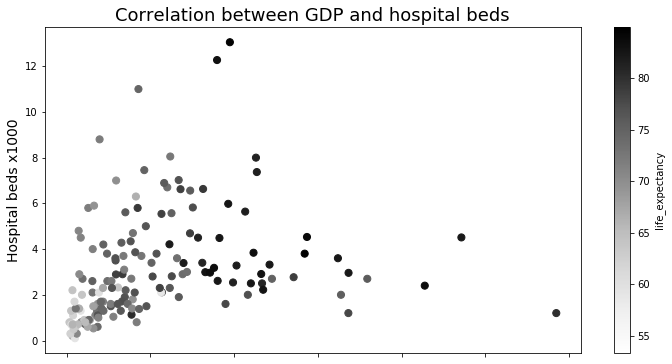

In [12]:
plt.figure(figsize=(10,5))
gdp_beds.plot.scatter('gdp_per_capita','hospital_beds_per_thousand',c = 'life_expectancy',s=50, figsize=(12,6))
plt.xlabel('GDP per capita', fontsize=14)
plt.ylabel('Hospital beds x1000', fontsize=14)
plt.title('Correlation between GDP and hospital beds', fontsize=18)
;

<b>Create dataframe for Spain data, then plot the data in different charts.<b>

In [13]:
spain = covid.location == 'Spain'
no_negatives_c = covid.new_cases >= 0
no_negatives_d = covid.new_deaths >= 0
spain_covid = covid[spain & no_negatives_c & no_negatives_d]

#Creating moving averages for the new cases/deaths columns
spain_covid['new_cases_ma'] = spain_covid.rolling(window=7)['new_cases'].mean()
spain_covid['new_deaths_ma'] = spain_covid.rolling(window=7)['new_deaths'].mean()

spain_covid = spain_covid[['date','location','total_cases','new_cases','new_cases_ma','total_deaths','new_deaths','new_deaths_ma']]
spain_covid.set_index('date',inplace=True)
spain_covid.tail()

C:\Users\shern\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\shern\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,total_cases,new_cases,new_cases_ma,total_deaths,new_deaths,new_deaths_ma
date,,,,,,,
2021-02-13,Spain,3056035.0,0.0,16292.142857,64747.0,0.0,480.142857
2021-02-14,Spain,3056035.0,0.0,16292.142857,64747.0,0.0,480.142857
2021-02-15,Spain,3086286.0,30251.0,13885.857143,65449.0,702.0,450.571429
2021-02-16,Spain,3096343.0,10057.0,12979.428571,65979.0,530.0,416.857143
2021-02-17,Spain,3107172.0,10829.0,11938.714286,66316.0,337.0,373.142857


''

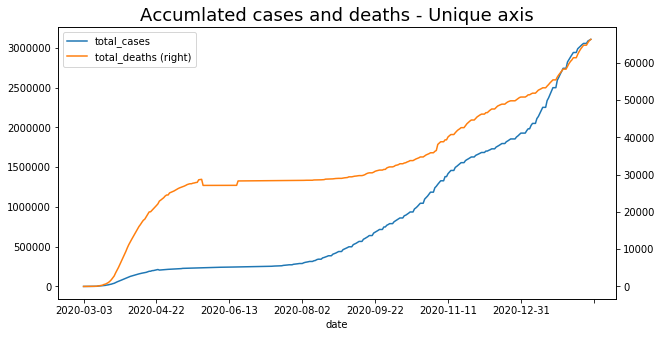

In [14]:
x = spain_covid['total_cases']
y = spain_covid['total_deaths']

ax = x.plot(legend=True)
plot = y.plot(figsize=(10,5), secondary_y=True, ax=ax, legend=True)
plt.title('Accumlated cases and deaths - Unique axis', fontsize=18)
;

''

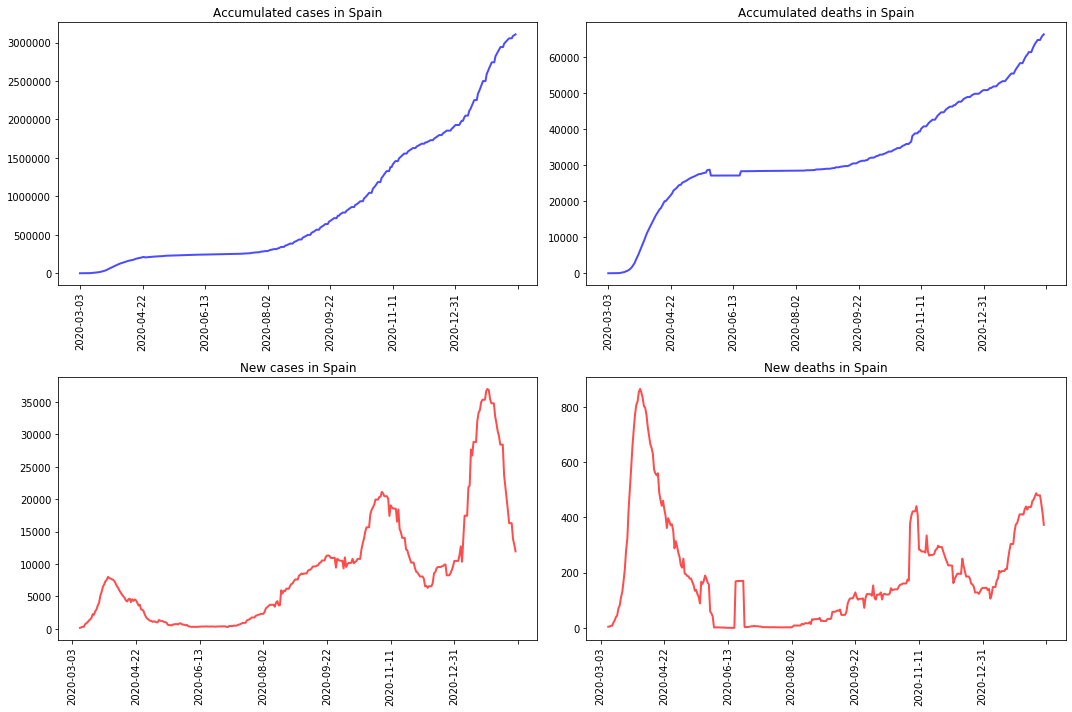

In [16]:
plt.subplot(2,2,1)
spain_covid['total_cases'].plot(figsize=(15,10), title='Accumulated cases in Spain', color='blue', linewidth=2, alpha=0.7)
plt.xticks(rotation='vertical')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,2)
spain_covid['total_deaths'].plot(figsize=(15,10), title='Accumulated deaths in Spain', color='blue', linewidth=2, alpha=0.7)
plt.xticks(rotation='vertical')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,3)
spain_covid['new_cases_ma'].plot(figsize=(15,10), title='New cases in Spain', color='red', linewidth=2, alpha=0.7)
plt.xticks(rotation='vertical')
plt.xlabel('')
plt.ylabel('')

plt.subplot(2,2,4)
spain_covid['new_deaths_ma'].plot(figsize=(15,10), title='New deaths in Spain', color='red', linewidth=2, alpha=0.7)
plt.xticks(rotation='vertical')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
;


Create the same type of dataframe but for the UK, later we will merge the data to create a unique plot for the two countries

In [17]:
uk_covid = covid['location'] == 'United Kingdom'
uk_covid = covid[uk_covid]
uk_covid = uk_covid[['date','location','total_cases','new_cases','total_deaths','new_deaths']]
uk_covid.set_index('date', inplace=True)
uk_covid.head()

,location,total_cases,new_cases,total_deaths,new_deaths
date,,,,,
2020-01-31,United Kingdom,2.0,2.0,NaN,NaN
2020-02-01,United Kingdom,2.0,0.0,NaN,NaN
2020-02-02,United Kingdom,2.0,0.0,NaN,NaN
2020-02-03,United Kingdom,8.0,6.0,NaN,NaN
2020-02-04,United Kingdom,8.0,0.0,NaN,NaN


Also the same for France

In [18]:
france = covid['location'] == 'France'
no_negatives_c = covid['new_cases'] >= 0
no_negatives_d = covid['new_deaths'] >= 0
france_covid = covid[france & no_negatives_c & no_negatives_d]
france_covid = france_covid[['date','location','total_cases','new_cases','total_deaths','new_deaths']]
france_covid.set_index('date', inplace=True)
france_covid.head()

,location,total_cases,new_cases,total_deaths,new_deaths
date,,,,,
2020-02-15,France,12.0,1.0,1.0,1.0
2020-02-16,France,12.0,0.0,1.0,0.0
2020-02-17,France,12.0,0.0,1.0,0.0
2020-02-18,France,12.0,0.0,1.0,0.0
2020-02-19,France,12.0,0.0,1.0,0.0


And also for Italy

In [19]:
italy_covid = covid['location'] == 'Italy'
italy_covid = covid[italy_covid]
italy_covid = italy_covid[['date','location','total_cases','new_cases','total_deaths','new_deaths']]
italy_covid.set_index('date', inplace=True)
italy_covid.head()

,location,total_cases,new_cases,total_deaths,new_deaths
date,,,,,
2020-01-31,Italy,2.0,2.0,NaN,NaN
2020-02-01,Italy,2.0,0.0,NaN,NaN
2020-02-02,Italy,2.0,0.0,NaN,NaN
2020-02-03,Italy,2.0,0.0,NaN,NaN
2020-02-04,Italy,2.0,0.0,NaN,NaN


After creating the dataframe for the UK we proceed with the merge in order to get data for both countries using the common index they share (the date)

In [20]:
spain_uk_covid = spain_covid.merge(uk_covid, how='left', left_on='date', right_on='date', suffixes=('_spain','_uk')).drop(['location_spain','location_uk'], axis='columns')
spain_uk_fr_covid = spain_uk_covid.merge(france_covid, how='left', left_on='date', right_on='date', suffixes=('','_france')).drop(['location'], axis='columns')
spain_uk_fr_it_covid = spain_uk_fr_covid.merge(italy_covid, how='left', left_on='date', right_on='date', suffixes=('','_italy')).drop(['location'], axis='columns')

In [21]:
spain_uk_fr_it_covid

,total_cases_spain,new_cases_spain,new_cases_ma,total_deaths_spain,new_deaths_spain,new_deaths_ma,total_cases_uk,new_cases_uk,total_deaths_uk,new_deaths_uk,total_cases,new_cases,total_deaths,new_deaths,total_cases_italy,new_cases_italy,total_deaths_italy,new_deaths_italy
date,,,,,,,,,,,,,,,,,,
2020-03-03,165.0,45.0,NaN,1.0,1.0,NaN,189.0,55.0,NaN,NaN,212.0,21.0,4.0,1.0,2502.0,466.0,79.0,27.0
2020-03-04,222.0,57.0,NaN,2.0,1.0,NaN,246.0,57.0,NaN,NaN,288.0,76.0,4.0,0.0,3089.0,587.0,107.0,28.0
2020-03-05,259.0,37.0,NaN,3.0,1.0,NaN,295.0,49.0,NaN,NaN,426.0,138.0,7.0,3.0,3858.0,769.0,148.0,41.0
2020-03-06,400.0,141.0,NaN,5.0,2.0,NaN,374.0,79.0,1.0,1.0,616.0,190.0,9.0,2.0,4636.0,778.0,197.0,49.0
2020-03-07,500.0,100.0,NaN,10.0,5.0,NaN,429.0,55.0,2.0,1.0,948.0,332.0,16.0,7.0,5883.0,1247.0,233.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-13,3056035.0,0.0,16292.142857,64747.0,0.0,480.142857,4038929.0,13355.0,117128.0,621.0,3507904.0,21231.0,81795.0,199.0,2710819.0,13523.0,93356.0,311.0
2021-02-14,3056035.0,0.0,16292.142857,64747.0,0.0,480.142857,4049920.0,10991.0,117387.0,259.0,3524450.0,16546.0,81962.0,167.0,2721879.0,11060.0,93577.0,221.0
2021-02-15,3086286.0,30251.0,13885.857143,65449.0,702.0,450.571429,4059696.0,9776.0,117622.0,235.0,3528856.0,4406.0,82374.0,412.0,2729223.0,7344.0,93835.0,258.0


In [22]:
spain_uk_fr_it_covid.rename(columns={'total_cases': 'total_cases_fr', 'new_cases': 'new_cases_fr', 'total_deaths': 'total_deaths_fr', 'new_deaths': 'new_deaths_fr'}, inplace=True)

In [23]:
spain_uk_fr_it_covid

,total_cases_spain,new_cases_spain,new_cases_ma,total_deaths_spain,new_deaths_spain,new_deaths_ma,total_cases_uk,new_cases_uk,total_deaths_uk,new_deaths_uk,total_cases_fr,new_cases_fr,total_deaths_fr,new_deaths_fr,total_cases_italy,new_cases_italy,total_deaths_italy,new_deaths_italy
date,,,,,,,,,,,,,,,,,,
2020-03-03,165.0,45.0,NaN,1.0,1.0,NaN,189.0,55.0,NaN,NaN,212.0,21.0,4.0,1.0,2502.0,466.0,79.0,27.0
2020-03-04,222.0,57.0,NaN,2.0,1.0,NaN,246.0,57.0,NaN,NaN,288.0,76.0,4.0,0.0,3089.0,587.0,107.0,28.0
2020-03-05,259.0,37.0,NaN,3.0,1.0,NaN,295.0,49.0,NaN,NaN,426.0,138.0,7.0,3.0,3858.0,769.0,148.0,41.0
2020-03-06,400.0,141.0,NaN,5.0,2.0,NaN,374.0,79.0,1.0,1.0,616.0,190.0,9.0,2.0,4636.0,778.0,197.0,49.0
2020-03-07,500.0,100.0,NaN,10.0,5.0,NaN,429.0,55.0,2.0,1.0,948.0,332.0,16.0,7.0,5883.0,1247.0,233.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-13,3056035.0,0.0,16292.142857,64747.0,0.0,480.142857,4038929.0,13355.0,117128.0,621.0,3507904.0,21231.0,81795.0,199.0,2710819.0,13523.0,93356.0,311.0
2021-02-14,3056035.0,0.0,16292.142857,64747.0,0.0,480.142857,4049920.0,10991.0,117387.0,259.0,3524450.0,16546.0,81962.0,167.0,2721879.0,11060.0,93577.0,221.0
2021-02-15,3086286.0,30251.0,13885.857143,65449.0,702.0,450.571429,4059696.0,9776.0,117622.0,235.0,3528856.0,4406.0,82374.0,412.0,2729223.0,7344.0,93835.0,258.0


''

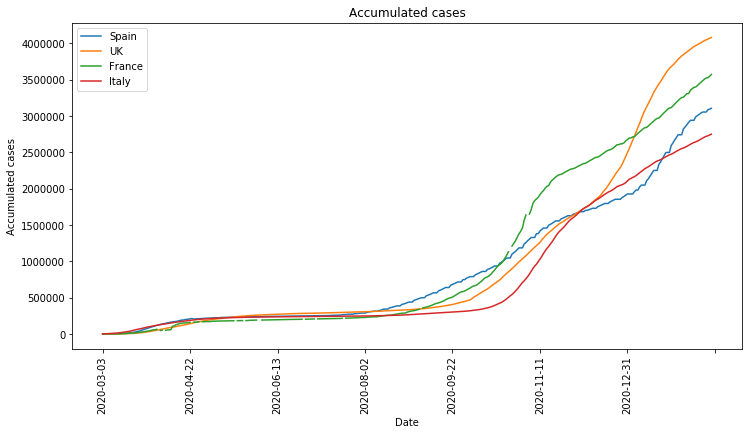

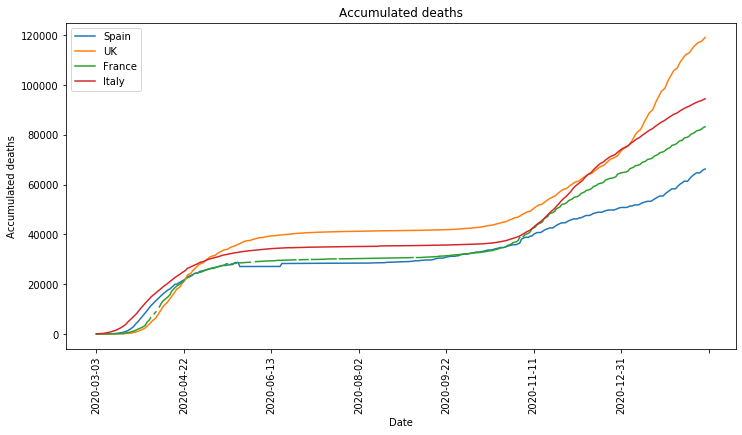

In [24]:
europe_cases = spain_uk_fr_it_covid[['total_cases_spain','total_cases_uk','total_cases_fr','total_cases_italy']]

europe_cases.plot(figsize=(12,6), title='Accumulated cases')
plt.legend(['Spain','UK','France','Italy'])
plt.xticks(rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Accumulated cases')

europe_deaths = spain_uk_fr_it_covid[['total_deaths_spain','total_deaths_uk','total_deaths_fr','total_deaths_italy']]

europe_deaths.plot(figsize=(12,6), title='Accumulated deaths')
plt.legend(['Spain','UK','France','Italy'])
plt.xticks(rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Accumulated deaths')
;

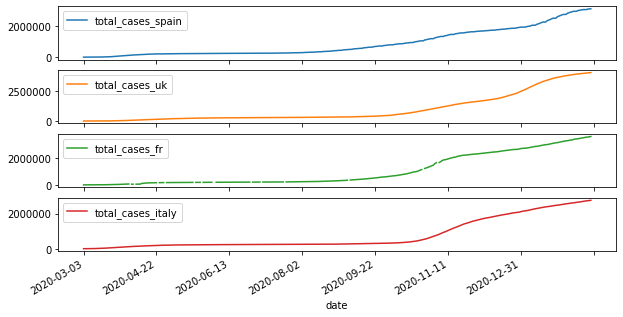

In [25]:
europe_cases.plot(subplots=True, figsize=(10,5));

''

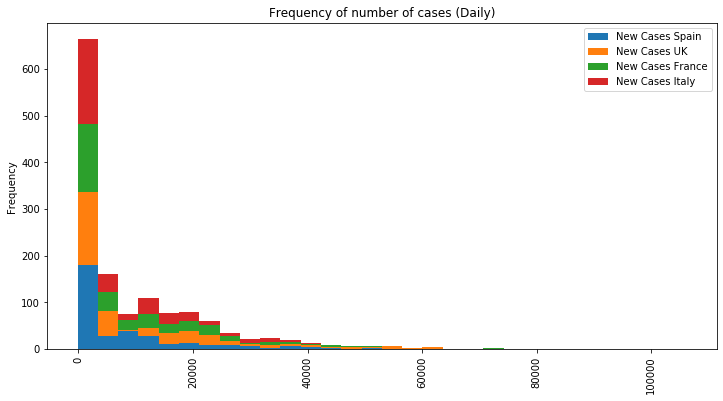

In [26]:
europe_cases_new = spain_uk_fr_it_covid[['new_cases_spain','new_cases_uk','new_cases_fr','new_cases_italy']]

europe_cases_new.plot(kind='hist', bins=30, stacked=True, figsize=(12,6))
plt.xticks(rotation='vertical')
plt.title('Frequency of number of cases (Daily)')
plt.legend(['New Cases Spain','New Cases UK', 'New Cases France','New Cases Italy'])
;

''

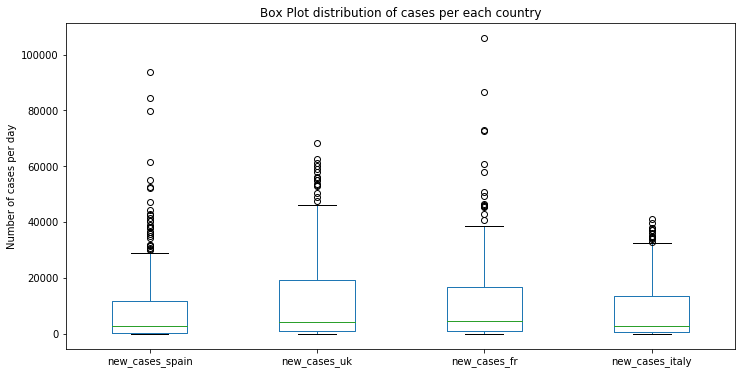

In [27]:
europe_cases_new.plot(kind='box', figsize=(12,6))
plt.ylabel('Number of cases per day')
plt.title('Box Plot distribution of cases per each country')
;

In [28]:
europe_cases_new.describe()

,new_cases_spain,new_cases_uk,new_cases_fr,new_cases_italy
count,349.000000,349.000000,335.000000,349.000000
mean,8923.455587,11677.148997,10822.925373,7867.690544
std,13662.286548,14563.552240,14247.756428,9797.659927
min,0.000000,6.000000,0.000000,-148.000000
25%,240.000000,1110.000000,808.500000,629.000000
50%,2789.000000,4327.000000,4388.000000,2667.000000
75%,11815.000000,19204.000000,16698.000000,13523.000000
max,93822.000000,68192.000000,106091.000000,40902.000000


''

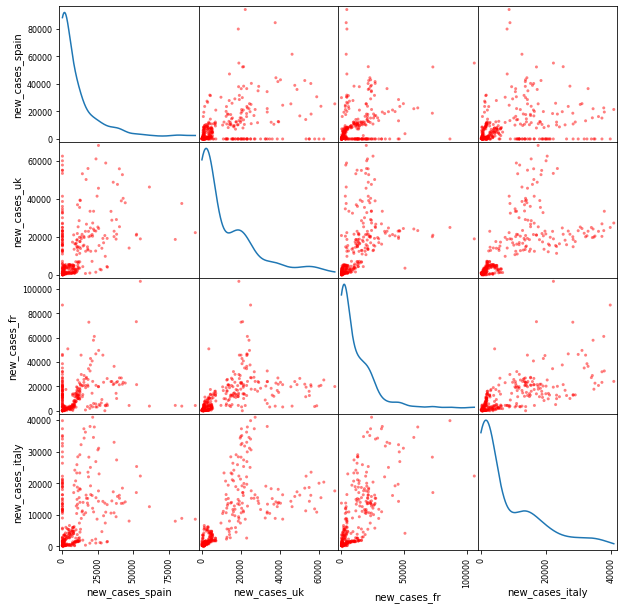

In [29]:
scatter_matrix(europe_cases_new, figsize=(10,10), diagonal='kde', color='r')
;

In [30]:
covid['continent'].value_counts()

Africa           18302
Europe           16817
Asia             16675
North America     8152
South America     4244
Oceania           1927
Name: continent, dtype: int64

In [31]:
#AFRICA DATA
covid_africa = covid['continent'] == 'Africa'
covid_africa = covid[covid_africa]
covid_africa = covid_africa[['date','continent','location','total_cases','new_cases','total_deaths','new_deaths']]
covid_africa = covid_africa.groupby('date').sum()

#ASIA DATA
covid_asia = covid['continent'] == 'Asia'
covid_asia = covid[covid_asia]
covid_asia = covid_asia[['date','continent','location','total_cases','new_cases','total_deaths','new_deaths']]
covid_asia = covid_asia.groupby('date').sum()

#EUROPE DATA
covid_europe = covid['continent'] == 'Europe'
covid_europe = covid[covid_europe]
covid_europe = covid_europe[['date','continent','location','total_cases','new_cases','total_deaths','new_deaths']]
covid_europe = covid_europe.groupby('date').sum()

#NORTH AMERICA DATA
covid_north_ame = covid['continent'] == 'North America'
covid_north_ame = covid[covid_north_ame]
covid_north_ame = covid_north_ame[['date','continent','location','total_cases','new_cases','total_deaths','new_deaths']]
covid_north_ame = covid_north_ame.groupby('date').sum()

#SOUTH AMERICA DATA
covid_south_ame = covid['continent'] == 'South America'
covid_south_ame = covid[covid_south_ame]
covid_south_ame = covid_south_ame[['date','continent','location','total_cases','new_cases','total_deaths','new_deaths']]
covid_south_ame = covid_south_ame.groupby('date').sum()

#OCEANIA DATA
covid_oceania = covid['continent'] == 'Oceania'
covid_oceania = covid[covid_oceania]
covid_oceania = covid_oceania[['date','continent','location','total_cases','new_cases','total_deaths','new_deaths']]
covid_oceania = covid_oceania.groupby('date').sum()

In [32]:
covid_af_as = covid_africa.merge(covid_asia, how='left', on='date', suffixes=('_africa','_asia')).drop(['total_deaths_africa','new_deaths_africa','total_deaths_asia','new_deaths_asia'], axis='columns')
covid_af_as_eu = covid_af_as.merge(covid_europe, how='left', on='date', suffixes=('','_europe')).drop(['total_deaths','new_deaths'], axis='columns')
covid_af_as_eu_na = covid_af_as_eu.merge(covid_north_ame, how='left', on='date', suffixes=('','_north_ame')).drop(['total_deaths','new_deaths'], axis='columns')
covid_af_as_eu_na_sa = covid_af_as_eu_na.merge(covid_south_ame, how='left', on='date', suffixes=('','_south_ame')).drop(['total_deaths','new_deaths'], axis='columns')
covid_af_as_eu_na_sa_oc = covid_af_as_eu_na_sa.merge(covid_oceania, how='left', on='date', suffixes=('','_oceania')).drop(['total_deaths','new_deaths'], axis='columns')

In [33]:
covid_af_as_eu_na_sa_oc.rename(columns={'total_cases': 'total_cases_europe','new_cases':'new_cases_europe'}, inplace=True)
covid_af_as_eu_na_sa_oc

,total_cases_africa,new_cases_africa,total_cases_asia,new_cases_asia,total_cases_europe,new_cases_europe,total_cases_north_ame,new_cases_north_ame,total_cases_south_ame,new_cases_south_ame,total_cases_oceania,new_cases_oceania
date,,,,,,,,,,,,
2020-02-07,0.0,0.0,34264.0,3527.0,37.0,2.0,19.0,2.0,0.0,0.0,15.0,1.0
2020-02-08,0.0,0.0,36989.0,2725.0,46.0,9.0,19.0,0.0,0.0,0.0,15.0,0.0
2020-02-09,0.0,0.0,40013.0,3024.0,49.0,3.0,19.0,0.0,0.0,0.0,15.0,0.0
2020-02-10,0.0,0.0,42551.0,2538.0,49.0,0.0,19.0,0.0,0.0,0.0,15.0,0.0
2020-02-11,0.0,0.0,44589.0,2038.0,52.0,3.0,20.0,1.0,0.0,0.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-13,3742849.0,10914.0,23995483.0,63055.0,32304948.0,121070.0,31645984.0,101626.0,16857776.0,72617.0,32224.0,8.0
2021-02-14,3753174.0,10325.0,24054158.0,58675.0,32398904.0,93956.0,31720347.0,74363.0,16914015.0,56239.0,32232.0,8.0
2021-02-15,3763067.0,9893.0,24113526.0,59368.0,32500970.0,102066.0,31784085.0,63738.0,16962278.0,48263.0,32239.0,7.0


''

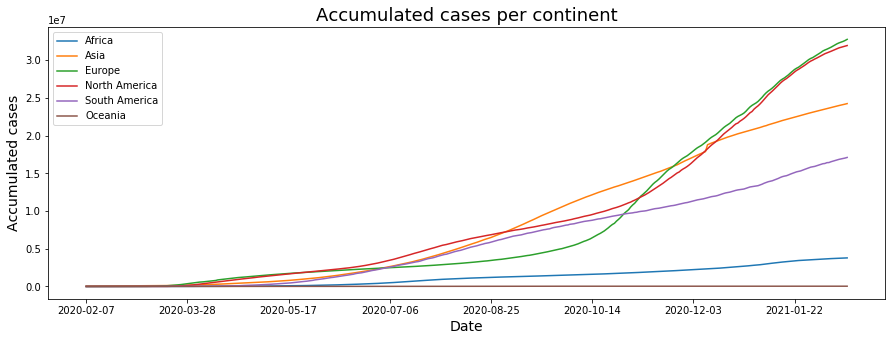

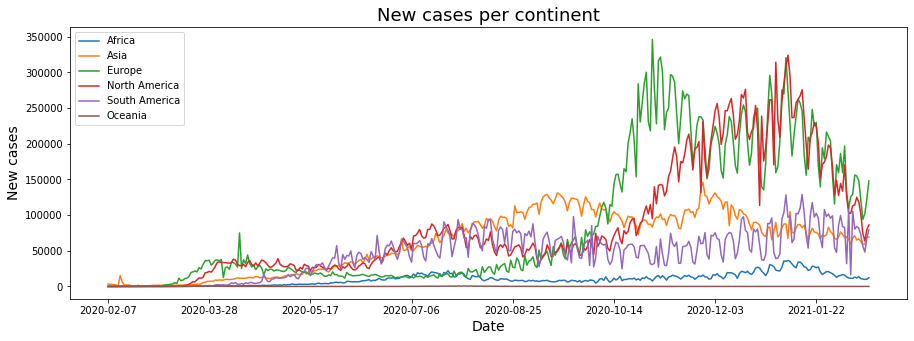

In [35]:
covid_af_as_eu_na_sa_oc[['total_cases_africa','total_cases_asia','total_cases_europe','total_cases_north_ame','total_cases_south_ame','total_cases_oceania']].plot(figsize=(15,5))
plt.legend(['Africa','Asia','Europe','North America','South America','Oceania'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Accumulated cases',fontsize=14)
plt.title('Accumulated cases per continent', fontsize=18)
;

covid_af_as_eu_na_sa_oc[['new_cases_africa','new_cases_asia','new_cases_europe','new_cases_north_ame','new_cases_south_ame','new_cases_oceania']].plot(figsize=(15,5))
plt.legend(['Africa','Asia','Europe','North America','South America','Oceania'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('New cases',fontsize=14)
plt.title('New cases per continent', fontsize=18)
;

In [26]:
vaccine = pd.read_csv('country_vaccinations.csv')
vaccine.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
